<a href="https://colab.research.google.com/github/adi-bhatl-1998/fastai_practice/blob/main/lesson2_identify_which_bear.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#hide
! [ -e /content ] && pip install -Uqq fastbook
import fastbook
fastbook.setup_book()
from fastbook import *
from fastai.vision.widgets import *

Mounted at /content/gdrive


In [ ]:
#hide
from fastbook import *
from fastai.vision.widgets import *

In [ ]:
pip install bing_image_downloader 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import ssl
ssl._create_default_https_context = ssl._create_unverified_context
from bing_image_downloader import downloader
downloader.download("grizzly bear", limit=50,  output_dir='dataset', adult_filter_off=True, force_replace=False, timeout=60, verbose=True)

[%] Downloading Images to /content/dataset/grizzly bear


[!!]Indexing page: 1

[%] Indexed 35 Images on Page 1.


[%] Downloading Image #1 from http://3.bp.blogspot.com/-S1scRCkI3vY/UHzV2kucsPI/AAAAAAAAA-k/YQ5UzHEm9Ss/s1600/Grizzly+Bear+Wildlife.jpg
[%] File Downloaded !

[%] Downloading Image #2 from https://s3.amazonaws.com/images.gearjunkie.com/uploads/2020/05/grizzly-bear.jpg
[%] File Downloaded !

[%] Downloading Image #3 from https://someinterestingfacts.net/wp-content/uploads/2016/07/Canadian-Grizzly-Bear.jpg
[%] File Downloaded !

[%] Downloading Image #4 from https://thelatebloomerhiker.files.wordpress.com/2014/11/grizzly-bear-22224-1920x1200.jpg
[%] File Downloaded !

[%] Downloading Image #5 from https://cdn.britannica.com/19/186719-050-887A6F2C/Grizzly-bear-Rocky-Mountains-Wyoming.jpg
[Error]Invalid image, not saving https://cdn.britannica.com/19/186719-050-887A6F2C/Grizzly-bear-Rocky-Mountains-Wyoming.jpg

[!] Issue getting: https://cdn.britannica.com/19/186719-050-887A6F

In [ ]:
!cd dataset

In [ ]:
!ls dataset/grizzly\ bear

Image_10.jpg  Image_1.jpg   Image_29.jpg  Image_38.jpg	Image_47.jpg
Image_11.jpg  Image_20.jpg  Image_2.jpg   Image_39.jpg	Image_48.jpg
Image_12.jpg  Image_21.jpg  Image_30.jpg  Image_3.jpg	Image_49.jpg
Image_13.jpg  Image_22.jpg  Image_31.jpg  Image_40.jpg	Image_4.jpg
Image_14.jpg  Image_23.jpg  Image_32.jpg  Image_41.jpg	Image_50.jpg
Image_15.jpg  Image_24.jpg  Image_33.jpg  Image_42.jpg	Image_5.jpg
Image_16.jpg  Image_25.jpg  Image_34.jpg  Image_43.jpg	Image_6.jpg
Image_17.jpg  Image_26.jpg  Image_35.jpg  Image_44.jpg	Image_7.jpg
Image_18.jpg  Image_27.jpg  Image_36.jpg  Image_45.jpg	Image_8.jpg
Image_19.jpg  Image_28.jpg  Image_37.jpg  Image_46.jpg	Image_9.jpg


In [ ]:
ims = ['http://3.bp.blogspot.com/-S1scRCkI3vY/UHzV2kucsPI/AAAAAAAAA-k/YQ5UzHEm9Ss/s1600/Grizzly%2BBear%2BWildlife.jpg']
dest = 'images/grizzly.jpg'
download_url(ims[0], dest)

Path('images/grizzly.jpg')

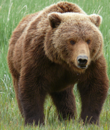

In [ ]:
im = Image.open(dest)
im.to_thumb(130,130)

In [ ]:
bear_types='grizzly','black','teddy'
path=Path('bears')
if not path.exists():
    path.mkdir()
from bing_image_downloader import downloader
for o in bear_types:
    dest=(path)
    downloader.download(f"{o} bear", limit=30,  output_dir=dest, adult_filter_off=True, force_replace=False, timeout=20, verbose=True)
    

[%] Downloading Images to /content/bears/grizzly bear


[!!]Indexing page: 1

[%] Indexed 30 Images on Page 1.


[%] Downloading Image #1 from http://3.bp.blogspot.com/-S1scRCkI3vY/UHzV2kucsPI/AAAAAAAAA-k/YQ5UzHEm9Ss/s1600/Grizzly+Bear+Wildlife.jpg
[%] File Downloaded !

[%] Downloading Image #2 from https://s3.amazonaws.com/images.gearjunkie.com/uploads/2020/05/grizzly-bear.jpg
[%] File Downloaded !

[%] Downloading Image #3 from https://someinterestingfacts.net/wp-content/uploads/2016/07/Canadian-Grizzly-Bear.jpg
[%] File Downloaded !

[%] Downloading Image #4 from https://thelatebloomerhiker.files.wordpress.com/2014/11/grizzly-bear-22224-1920x1200.jpg
[%] File Downloaded !

[%] Downloading Image #5 from https://cdn.britannica.com/19/186719-050-887A6F2C/Grizzly-bear-Rocky-Mountains-Wyoming.jpg
[Error]Invalid image, not saving https://cdn.britannica.com/19/186719-050-887A6F2C/Grizzly-bear-Rocky-Mountains-Wyoming.jpg

[!] Issue getting: https://cdn.britannica.com/19/186719-050-887A6F2C

In [ ]:
fns = get_image_files(path)
fns

(#90) [Path('bears/black bear/Image_18.jpg'),Path('bears/black bear/Image_26.jpg'),Path('bears/black bear/Image_12.jpg'),Path('bears/black bear/Image_15.jpg'),Path('bears/black bear/Image_16.jpg'),Path('bears/black bear/Image_30.jpg'),Path('bears/black bear/Image_17.jpg'),Path('bears/black bear/Image_4.jpg'),Path('bears/black bear/Image_22.jpg'),Path('bears/black bear/Image_14.jpg')...]

In [ ]:
failed=verify_images(fns)
failed

(#0) []

In [ ]:
!ls;cd sample_data;ls

gdrive	images	sample_data
anscombe.json		      mnist_test.csv
california_housing_test.csv   mnist_train_small.csv
california_housing_train.csv  README.md


failed.map(Path.unlink)

In [ ]:
bears = DataBlock(
        blocks=(ImageBlock,CategoryBlock),
        get_items=get_image_files,
        splitter=RandomSplitter(valid_pct=0.2,seed=42),
        get_y=parent_label,
        item_tfms=Resize(128))

In [ ]:

dls = bears.dataloaders(path)

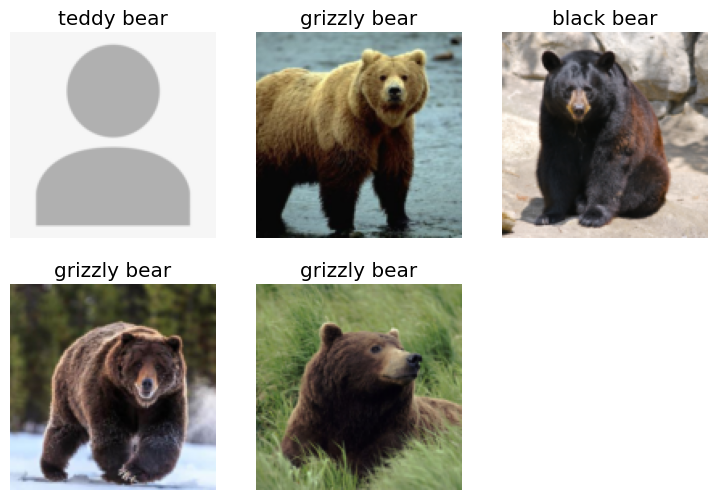

In [ ]:
dls.valid.show_batch(max_n=5, nrows=2)

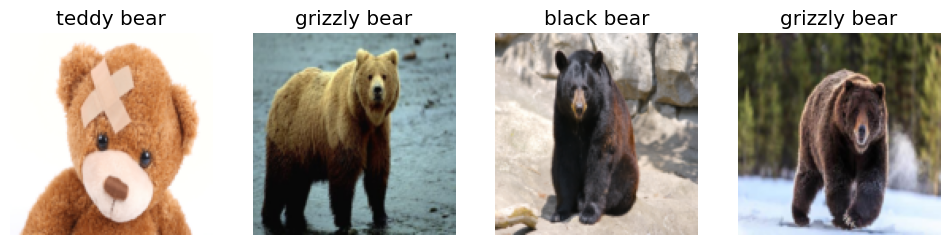

In [ ]:
bears=bears.new(item_tfms=Resize(128,ResizeMethod.Squish))
dls=bears.dataloaders(path)
dls.valid.show_batch(max_n=4,nrows=1)

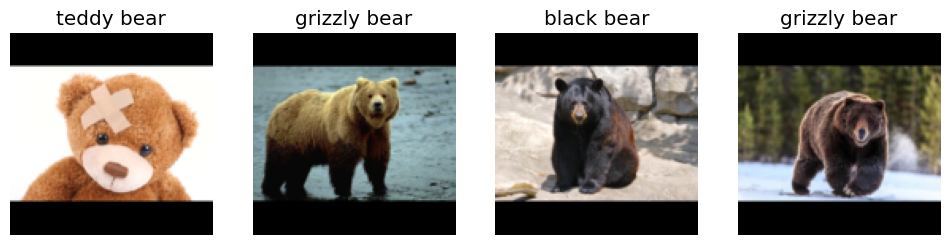

In [ ]:
bears=bears.new(item_tfms=Resize(128,ResizeMethod.Pad,pad_mode='zeros'))
dls=bears.dataloaders(path)
dls.valid.show_batch(max_n=4,nrows=1)

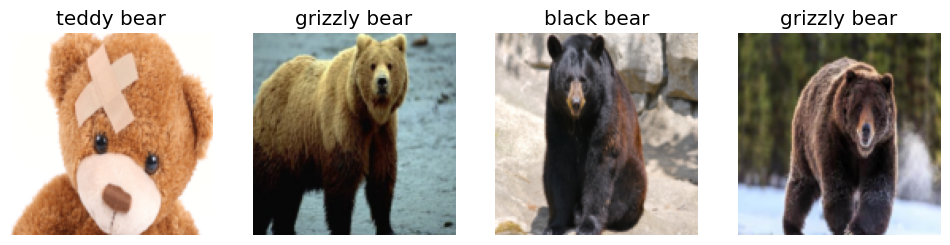

In [ ]:
bears=bears.new(item_tfms=RandomResizedCrop(128, min_scale=0.3))
dls=bears.dataloaders(path)
dls.valid.show_batch(max_n=4,nrows=1)

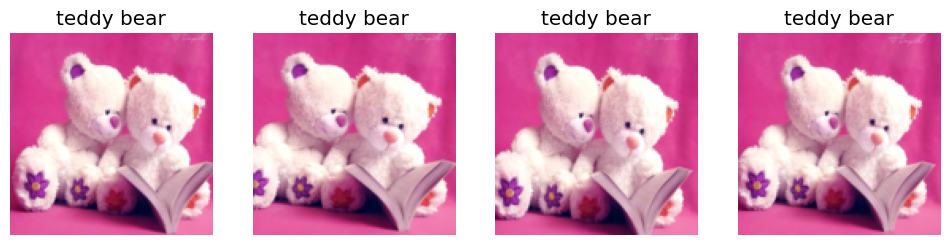

In [ ]:
bears = bears.new(item_tfms=RandomResizedCrop(128, min_scale=0.8))
dls = bears.dataloaders(path)
dls.train.show_batch(max_n=4, nrows=1, unique=True)

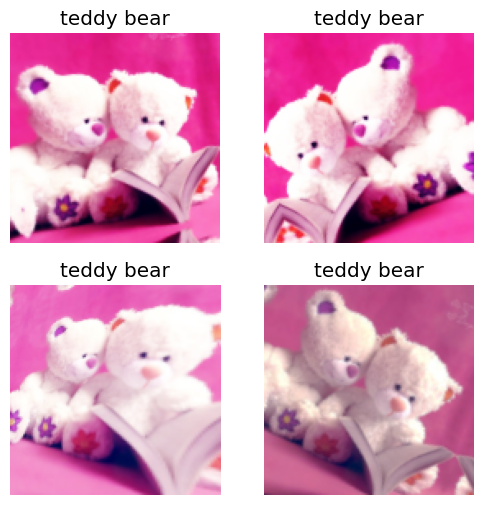

In [ ]:
bears = bears.new(item_tfms=Resize(128), batch_tfms=aug_transforms(mult=2))
dls = bears.dataloaders(path)
dls.train.show_batch(max_n=4, nrows=2, unique=True)

In [ ]:
bears = bears.new(
    item_tfms=RandomResizedCrop(224, min_scale=0.5),
    batch_tfms=aug_transforms())
dls = bears.dataloaders(path)

In [ ]:
learn = vision_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(4)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 177MB/s]


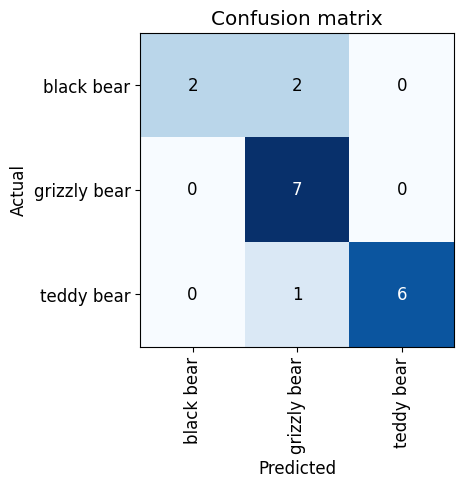

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

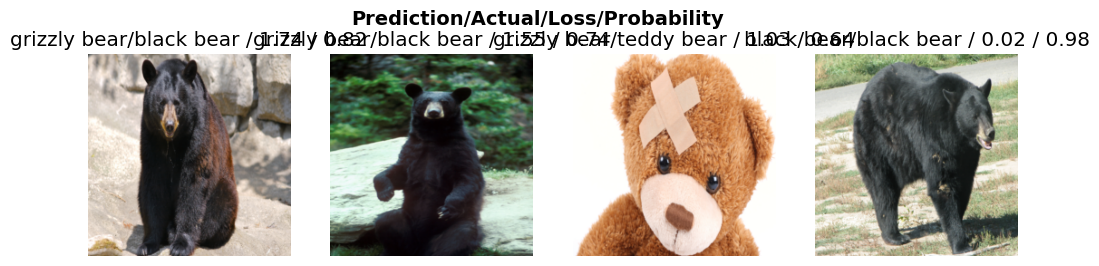

In [ ]:
interp.plot_top_losses(4, nrows=1)

In [ ]:
cleaner=ImageClassifierCleaner(learn)
cleaner

In [ ]:
for idx in cleaner.delete():
  cleaner.fns[idx].unlink()

In [ ]:
for idx,cat in cleaner.change():
  print(str(path/cat)+'/moved-'+str(cleaner.fns[idx].name))  
  shutil.move(str(cleaner.fns[idx]), str(path/cat)+'/moved-'+str(cleaner.fns[idx].name))


bears/grizzly bear/moved-Image_15.jpg


In [ ]:
learn.export()

In [ ]:
path=Path()
path.ls(file_exts=".pkl")

(#1) [Path('export.pkl')]

In [ ]:
learn_inference=load_learner(path/'export.pkl')


In [ ]:
learn_inference.predict('images/grizzly.jpg')

('grizzly bear', tensor(1), tensor([4.0611e-04, 9.9947e-01, 1.2312e-04]))

In [ ]:
learn_inference.dls.vocab[1]

'grizzly bear'

In [ ]:
#hide_output
btn_upload = widgets.FileUpload()
btn_upload

FileUpload(value={}, description='Upload')

In [ ]:
image=PILImage.create(btn_upload.data[-1])

IndexError: ignored

In [ ]:
output=widgets.Output()
output.clear_output()
with output:display(image.to_thumb(128,128))
output

Output()

In [ ]:
#pred,pred_idx,prob=learn_inference(image)
pred,pred_idx,probs =learn_inference.predict(image)
print(pred,pred_idx,probs)

grizzly bear tensor(1) tensor([0.1945, 0.8032, 0.0023])


In [ ]:
lbl_predicts=widgets.Label()
lbl_predicts.value=f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'
lbl_predicts


Label(value='Prediction: grizzly bear; Probability: 0.8032')

In [ ]:
btn_run = widgets.Button(description='Classify')
btn_run

Button(description='Classify', style=ButtonStyle())

In [ ]:
def on_click_classify(change):
    img = PILImage.create(btn_upload.data[-1])
    output.clear_output()
    with output: display(img.to_thumb(128,128))
    pred,pred_idx,probs = learn_inference.predict(img)
    lbl_predicts.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'

btn_run.on_click(on_click_classify)

In [ ]:
btn_upload = widgets.FileUpload()

In [ ]:
VBox([widgets.Label('Select your bear!'), 
      btn_upload, btn_run, output, lbl_predicts])

In [ ]:
!pip install voila
!jupyter serverextension enable --sys-prefix voila

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 33.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.9/129.9 kB 13.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.0/57.0 kB 6.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.4/90.4 kB 8.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.5/62.5 kB 6.9 MB/s eta 0:00:00
  Attempting uninstall: requests
    Found existing installation: requests 2.27.1
    Uninstalling requests-2.27.1:
      Successfully uninstalled requests-2.27.1
  Attempting uninstall: jsonschema
    Found existing installation: jsonschema 4.3.3
    Uninstalling jsonschema-4.3.3:
      Successfully uninstalled jsonschema-4.3.3


Enabling: voila
- Writing config: /usr/etc/jupyter
    - Validating...
      voila 0.4.0 OK
